### Elementos finitos linear 1D

## Montar a matrix de massa

In [121]:
using Jacobi

## Funções

In [122]:
remap(x,a,b) = ((1-x)*a + (1+x)*b)/2

remap (generic function with 1 method)

In [123]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj (generic function with 1 method)

In [124]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix (generic function with 1 method)

In [125]:
function  ϕ_matrix_interp(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = linspace(-1,1,Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix_interp (generic function with 1 method)

In [126]:
function Mass_matrix(ϕ,w,M,Q)
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end

Mass_matrix (generic function with 1 method)

### $ϕ$ e  matriz de massa

In [127]:
I = 40
Q = I+2
z = zglj(Q)
w = wglj(z)
ϕ = ϕ_matrix(ψj,Q,I);
Mass = Mass_matrix(ϕ,w,I,Q);


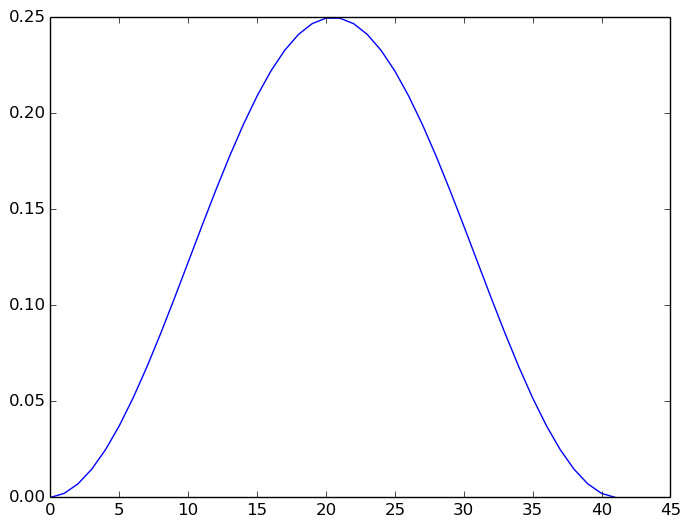

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7face8995f50>

In [128]:
using PyPlot
plot(ϕ[:,3])

In [129]:
fun(x) = sin(2*π*x)
F = zeros(I);
f = fun(z)
for i in 1:I
    for q in 1:Q
        F[i] += f[q]*ϕ[q,i]*w[q]
    end
end

## solve

In [130]:
u = Mass\F;

In [131]:
uq = ϕ*u;

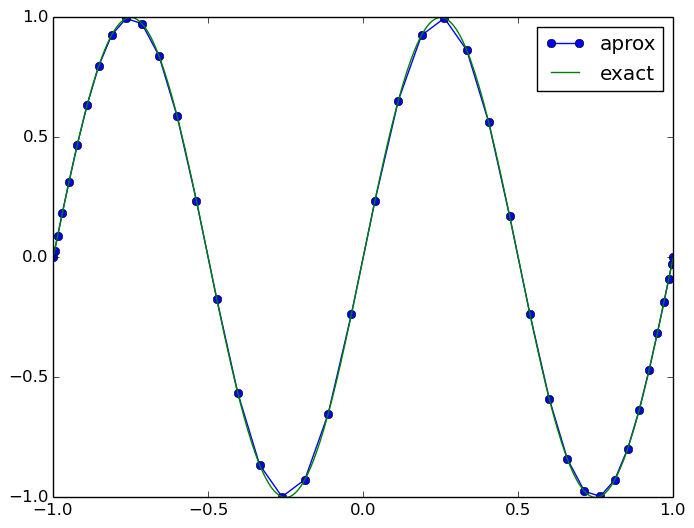

PyObject <matplotlib.legend.Legend object at 0x7face88d8690>

In [132]:
xx = linspace(-1,1,301)
plot(z,uq,label = "aprox","o-")
plot(xx,fun(xx),label = "exact")
legend()

In [133]:
maxabs(uq - fun(z))

1.693606417666393e-13

In [134]:
ϕ_interp = ϕ_matrix_interp(ψj,201,I);
uq = ϕ_interp * u;

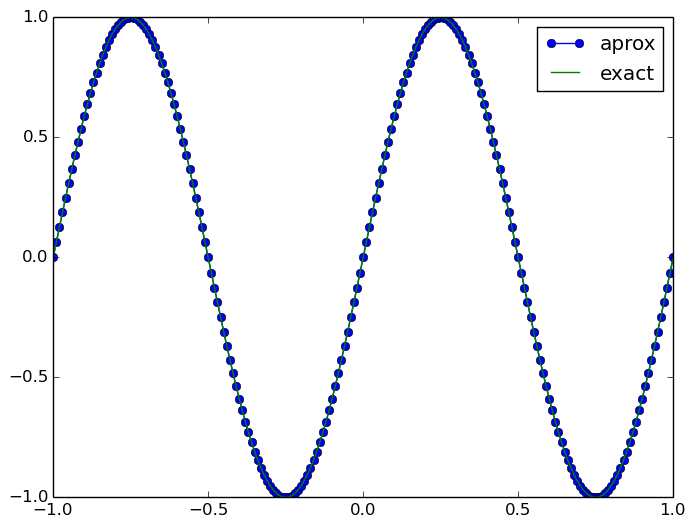

PyObject <matplotlib.legend.Legend object at 0x7face8886590>

In [135]:
xx = linspace(-1,1,201)
plot(xx,uq,label = "aprox","o-")
plot(xx,fun(xx),label = "exact")
legend()

In [136]:
maxabs(uq - fun(xx))

1.693606417666393e-13

### Fazendo pra a = 0 , b =5

In [137]:
a = 0; b = 5
jac = (b-a)/2

2.5

In [138]:
function Mass_matrix2(ϕ,w,M,Q,jac)
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]*jac
            end
            L[i,j] = m
        end
    end
    return L
end

Mass_matrix2 (generic function with 1 method)

In [139]:
M2 = Mass_matrix2(ϕ,w,I,Q,jac);

In [140]:
fun(x) = sin(2*π*x)
F = zeros(I);
f = fun(remap(z,a,b))
for i in 1:I
    for q in 1:Q
        F[i] += f[q]*ϕ[q,i]*w[q]*jac
    end
end

In [141]:
u2 = M2\F;

In [142]:
ϕ_interp = ϕ_matrix_interp(ψj,201,I);

In [143]:
uq2 = ϕ_interp*u2;

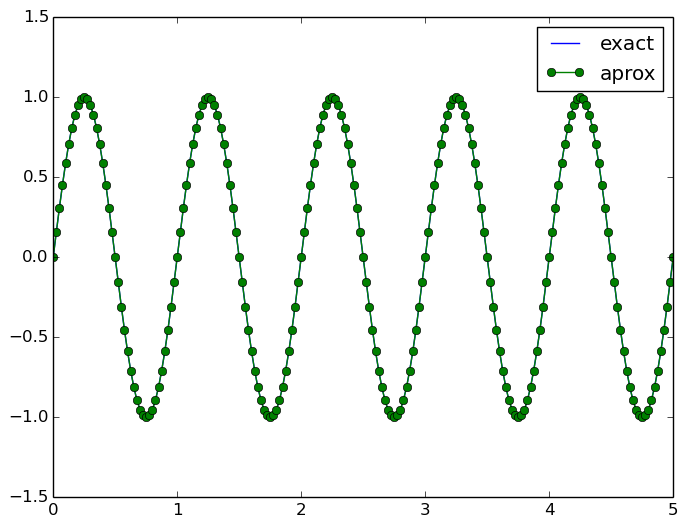

PyObject <matplotlib.legend.Legend object at 0x7face88395d0>

In [144]:
xx = linspace(a,b,201)
plot(xx,[fun(xx) for xx in xx],label="exact")
plot(xx,uq2,label="aprox","o-")
legend()

In [145]:
maxabs(uq2 - fun(xx))

4.682639954687564e-13